In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plotter

df = pd.read_csv('./assets/googleplaystore_cleaned.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10829 non-null  object 
 1   Category            10829 non-null  object 
 2   Rating              10829 non-null  float64
 3   Reviews             10829 non-null  int64  
 4   Size                9135 non-null   float64
 5   Installs            10829 non-null  int64  
 6   Type                10829 non-null  object 
 7   Price               10829 non-null  float64
 8   Content Rating      10829 non-null  object 
 9   Current Ver         10829 non-null  object 
 10  Android Ver         10829 non-null  object 
 11  Last Updated Date   10829 non-null  int64  
 12  Last Updated Month  10829 non-null  int64  
 13  Last Updated Year   10829 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.2+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Current Ver,Android Ver,Last Updated Date,Last Updated Month,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,1.1,4.4 and up,20,6,2018


In [48]:
# Step 2 :- Exploratory Data Analysis (EDA) and Feature Engineering

# Explore Datatypes of Features
def datatype_summary(df):
    objects = []
    numeric = []
    for feature in df.columns:
        if df[feature].dtype == 'O':
            objects.append(feature)
        elif df[feature].dtype == 'int' or df[feature].dtype == 'float': 
            numeric.append(feature)

    print(f'{len(numeric)} Numeric Features:', numeric)
    print(f'{len(objects)} Object Features:', objects)
    return (objects, numeric)

(objects, numeric) = datatype_summary(df)

# Handle Object Features First then Numeric Features

8 Numeric Features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated Date', 'Last Updated Month', 'Last Updated Year']
6 Object Features: ['App', 'Category', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']


In [49]:
# Checking Duplicates in App Feature
print('Duplicates in App Column:', df['App'].duplicated().sum(axis = 0))

# Remove the records with duplicate AppNames
df = df[~df['App'].duplicated()]

print('Unique Records:', df.shape[0])
df.head()

Duplicates in App Column: 1181
Unique Records: 9648


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Current Ver,Android Ver,Last Updated Date,Last Updated Month,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,1.1,4.4 and up,20,6,2018


               Category     Installs
14                 GAME  13878924415
6         COMMUNICATION  11038276251
29                TOOLS   8001271905
25         PRODUCTIVITY   5793091369
27               SOCIAL   5487867902
24          PHOTOGRAPHY   4649147655
11               FAMILY   4427881405
31        VIDEO_PLAYERS   3926902720
30     TRAVEL_AND_LOCAL   2894887146
21   NEWS_AND_MAGAZINES   2369217760
9         ENTERTAINMENT   2113660000
3   BOOKS_AND_REFERENCE   1665968576
23      PERSONALIZATION   1532483782
26             SHOPPING   1400348785
15   HEALTH_AND_FITNESS   1144022512
28               SPORTS   1096474498
4              BUSINESS    697164865
18            LIFESTYLE    503823539
19  MAPS_AND_NAVIGATION    503281890
12              FINANCE    455348734
32              WEATHER    361100520
8             EDUCATION    352952000
13       FOOD_AND_DRINK    211798751
7                DATING    140926107
0        ART_AND_DESIGN    114333100
16       HOUSE_AND_HOME     97212461
1

<BarContainer object of 33 artists>

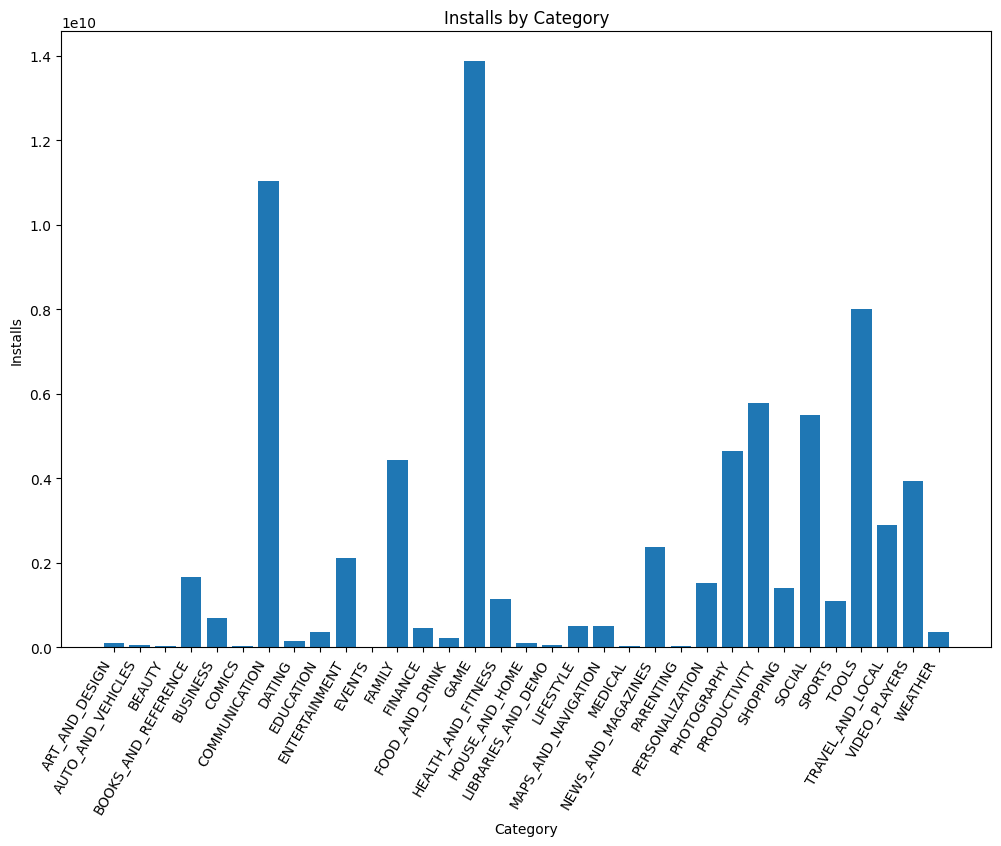

In [51]:
# Common EDAs

# Which is the most popular app category (sorted by installs)
grouped_category = df.groupby(['Category'])[['Installs']].agg('sum')
grouped_category.reset_index(drop = False, inplace = True)

sorted_index = grouped_category['Installs'].argsort(axis = 0)[::-1]
print(grouped_category.iloc[sorted_index])

plotter.figure(figsize=(12, 8))
plotter.subplot(1,1,1)
plotter.title("Installs by Category")
plotter.xlabel("Category")
plotter.ylabel("Installs")
plotter.xticks(rotation = 60, ha = "right")
plotter.bar(grouped_category['Category'], grouped_category['Installs'])


In [59]:
# How many apps are there on Playstore with 5 star ratings

print(df[df['Rating'] == 5][['App', 'Rating']])
print("Apps with 5 Star Ratings:", df[df['Rating'] == 5].__len__())

                                              App  Rating
328                  Hojiboy Tojiboyev Life Hacks     5.0
611                 American Girls Mobile Numbers     5.0
614                                  Awake Dating     5.0
632                         Spine- The dating app     5.0
635    Girls Live Talk - Free Text and Video Chat     5.0
...                                           ...     ...
10709                           Mad Dash Fo' Cash     5.0
10730                       GKPB FP Online Church     5.0
10764                            Monster Ride Pro     5.0
10808                             Fr. Daoud Lamei     5.0
10825            Fr. Mike Schmitz Audio Teachings     5.0

[271 rows x 2 columns]
Apps with 5 Star Ratings: 271


In [ ]:
# Explore the top 5 most installed apps in each categories

categories = df['Category'].unique().tolist()
print(categories)

for category in categories:
    categorical_df = df[df['Category'] == category]             # filter the indexes and get the rows with given categories
    categorical_df.reset_index(inplace = True, drop = True)     # reset the index to work with .loc
    sorted_idx = categorical_df['Installs'].argsort()[-1:0:-1]  # get position indices of sorted Installs column

    top5 = categorical_df.loc[sorted_idx]                       # reaarange the categorical dataframe using sorted indices
    top5 = top5.iloc[0:min(5, len(top5))].reset_index(drop = True)   # get top 5 entries using positional indexing .iloc method

    print(f"-------- For Category {category} --------")
    print(top5[['App', 'Installs']])
    print()

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
-------- For Category ART_AND_DESIGN --------
                                                 App  Installs
0                              Sketch - Draw & Paint  50000000
1                         Textgram - write on photos  10000000
2  Canva: Poster, banner, card maker & graphic de...  10000000
3                                       ibis Paint X  10000000
4                     Tattoo Name On My Photo Editor  10000000

-------- For Category AUTO_AND_VEHICLES --------
                                  